In [41]:
#!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

### 1. Read in training and evaluation file ran for datasets that only contained 1200 RPM

In [2]:
train_0D = pd.read_csv('train_0D_FE_1200.csv')
train_1D = pd.read_csv('train_1D_FE_1200.csv')
train_2D = pd.read_csv('train_2D_FE_1200.csv')
train_3D = pd.read_csv('train_3D_FE_1200.csv')
train_4D = pd.read_csv('train_4D_FE_1200.csv')

eval_0E = pd.read_csv('eval_0E_FE_1200.csv')
eval_1E = pd.read_csv('eval_1E_FE_1200.csv')
eval_2E = pd.read_csv('eval_2E_FE_1200.csv')
eval_3E = pd.read_csv('eval_3E_FE_1200.csv')
eval_4E = pd.read_csv('eval_4E_FE_1200.csv')

In [3]:
print(train_0D.shape)
print(train_1D.shape)
print(train_2D.shape)
print(train_3D.shape)
print(train_4D.shape)
print(eval_0E.shape)
print(eval_1E.shape)
print(eval_2E.shape)
print(eval_3E.shape)
print(eval_4E.shape)

(81920, 9)
(86016, 9)
(65536, 9)
(114688, 9)
(77824, 9)
(28672, 9)
(20480, 9)
(32768, 9)
(40960, 9)
(16384, 9)


In [4]:
# Use a function to split the data into 1s windows (4096 rows each) into X and y where y is the label of unbalanced or balance
# label the Xs and Ys

def split_X_y(data, label):
    n = int(len(data)/4096)
    print('no. of windows:',n)
    data = data[:int(n)*4096]
    X = data.values.reshape((n, 4096))
    y = np.ones(n)*labels[label]
    return X,y

labels = {'no_unbalance':0, 'unbalance':1}

X0,y0 = split_X_y(train_0D['Vibration_1'], "no_unbalance")
X0,y0


no. of windows: 20


(array([[-3.3378601e-05, -3.5762787e-05,  3.2627583e-03, ...,
          4.7683716e-04,  4.2676926e-04,  1.5151501e-03],
        [-1.0013580e-03,  1.9073486e-03,  3.6168098e-03, ...,
          3.8862228e-04, -4.7683716e-05, -2.3722649e-04],
        [ 5.4717064e-04,  3.2675266e-03,  1.8215179e-03, ...,
         -1.1801720e-04,  2.2375584e-03,  2.4247169e-03],
        ...,
        [-2.5403500e-03,  2.3305416e-03, -1.5294552e-03, ...,
          1.6758442e-02, -1.2463331e-02, -2.5355816e-03],
        [ 3.2901764e-04, -1.0728836e-05,  1.0490417e-04, ...,
         -1.5974045e-04, -2.1696091e-04, -3.5405159e-04],
        [ 2.4962425e-03,  1.4448166e-03,  1.4579296e-03, ...,
          1.2779236e-03,  1.0991096e-03,  1.7678738e-03]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]))

In [5]:
print("training below")
print()

X1,y1 = split_X_y(train_1D['Vibration_1'], "unbalance")
X2,y2 = split_X_y(train_2D['Vibration_1'], "unbalance")
X3,y3 = split_X_y(train_3D['Vibration_1'], "unbalance")
X4,y4 = split_X_y(train_4D['Vibration_1'], "unbalance")
print()
print("evaluation below")
print()

Xe0,ye0 = split_X_y(eval_0E['Vibration_1'],"no_unbalance")
Xe1,ye1 = split_X_y(eval_1E['Vibration_1'],"unbalance")
Xe2,ye2 = split_X_y(eval_2E['Vibration_1'],"unbalance")
Xe3,ye3 = split_X_y(eval_3E['Vibration_1'],"unbalance")
Xe4,ye4 = split_X_y(eval_4E['Vibration_1'],"unbalance")


training below

no. of windows: 21
no. of windows: 16
no. of windows: 28
no. of windows: 19

evaluation below

no. of windows: 7
no. of windows: 5
no. of windows: 8
no. of windows: 10
no. of windows: 4


### Feature Engineering with Fast Fourier Transform - FFT

In [6]:
fft_result_0D = np.fft.fft(train_0D['Vibration_1'])
frequencies_0D = np.fft.fftfreq(len(train_0D['Vibration_1']))

# Print the Fourier Transform result
print("Frequency domain representation:")
for freq, value in zip(frequencies_0D, fft_result_0D):
    print("Frequency:", freq, "Magnitude:", np.abs(value))

Frequency domain representation:
Frequency: 0.0 Magnitude: 53.38801980076081
Frequency: 1.220703125e-05 Magnitude: 2.6740580536850853
Frequency: 2.44140625e-05 Magnitude: 0.29163774629857014
Frequency: 3.6621093750000005e-05 Magnitude: 0.5156452970557768
Frequency: 4.8828125e-05 Magnitude: 0.31903650723392035
Frequency: 6.103515625e-05 Magnitude: 0.46204708147306217
Frequency: 7.324218750000001e-05 Magnitude: 0.4712657734618816
Frequency: 8.544921875000001e-05 Magnitude: 0.37873923861147657
Frequency: 9.765625e-05 Magnitude: 0.28640609687157526
Frequency: 0.00010986328125 Magnitude: 0.15605024016377
Frequency: 0.0001220703125 Magnitude: 0.02501172283360348
Frequency: 0.00013427734375 Magnitude: 0.1500354625075731
Frequency: 0.00014648437500000002 Magnitude: 0.1996203895905913
Frequency: 0.00015869140625 Magnitude: 0.14945312826196536
Frequency: 0.00017089843750000002 Magnitude: 0.3581368809812319
Frequency: 0.00018310546875 Magnitude: 0.01040253698059655
Frequency: 0.0001953125 Magnitu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Frequency: -0.007067871093750001 Magnitude: 0.03816549305419226
Frequency: -0.0070556640625000005 Magnitude: 0.009253401253298767
Frequency: -0.00704345703125 Magnitude: 0.10270642936811951
Frequency: -0.00703125 Magnitude: 0.06000623003166348
Frequency: -0.00701904296875 Magnitude: 0.03315530570464511
Frequency: -0.007006835937500001 Magnitude: 0.04924656496304194
Frequency: -0.0069946289062500005 Magnitude: 0.037056164672232945
Frequency: -0.006982421875 Magnitude: 0.029260282265661262
Frequency: -0.00697021484375 Magnitude: 0.08535587676548013
Frequency: -0.0069580078125 Magnitude: 0.05411953128297479
Frequency: -0.006945800781250001 Magnitude: 0.0637442770865456
Frequency: -0.0069335937500000005 Magnitude: 0.04400196588035654
Frequency: -0.00692138671875 Magnitude: 0.09016613302385629
Frequency: -0.0069091796875 Magnitude: 0.0653449212020189
Frequency: -0.00689697265625 Magnitude: 0.008276215244878543
Frequency: -0.006884765625000001 Magnitude: 0.007433091529980726
Frequency: -0.00

In [7]:
# apply FFT algorithm on development

fft_result_1D = np.fft.fft(train_1D['Vibration_1'])
frequencies_1D = np.fft.fftfreq(len(train_1D['Vibration_1']))
fft_result_2D = np.fft.fft(train_2D['Vibration_1'])
frequencies_2D = np.fft.fftfreq(len(train_2D['Vibration_1']))
fft_result_3D = np.fft.fft(train_3D['Vibration_1'])
frequencies_3D = np.fft.fftfreq(len(train_3D['Vibration_1']))
fft_result_4D = np.fft.fft(train_4D['Vibration_1'])
frequencies_4D = np.fft.fftfreq(len(train_4D['Vibration_1']))


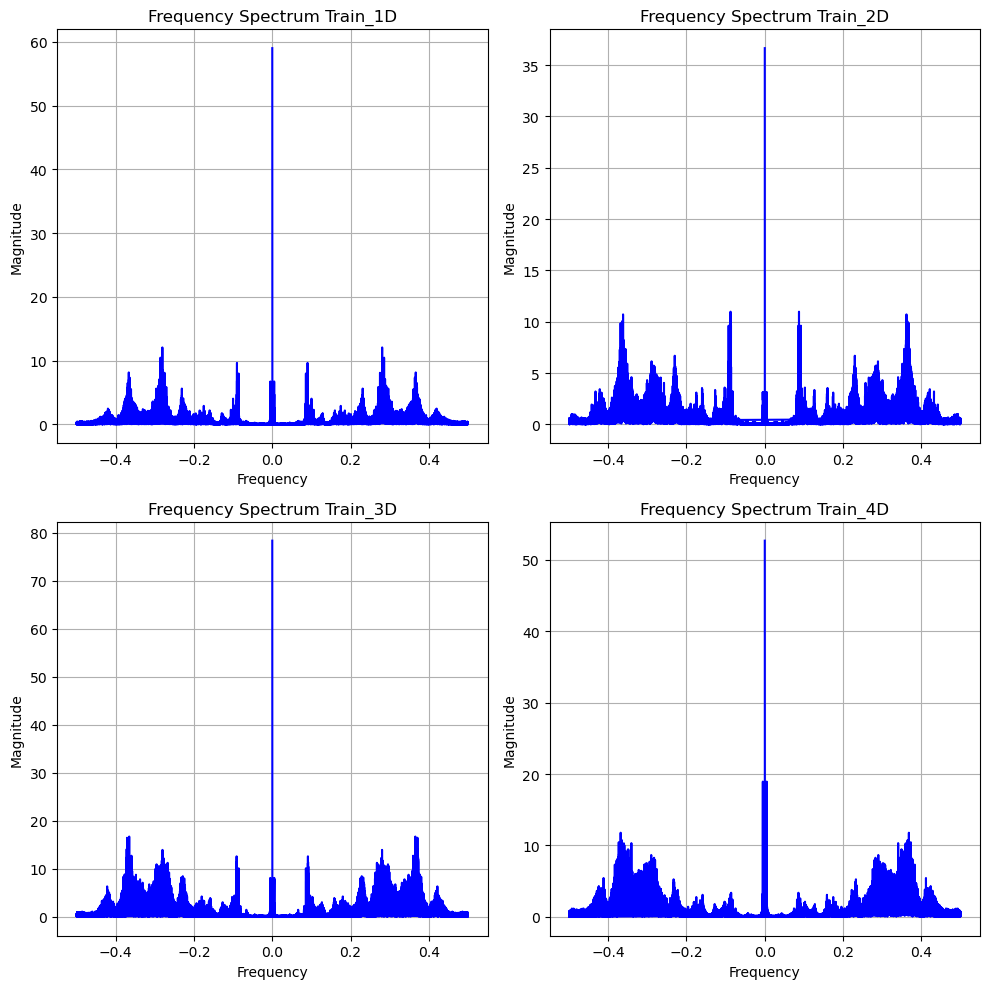

In [8]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Line chart on the top left (axs[0, 0])
axs[0, 0].plot(frequencies_1D, np.abs(fft_result_1D), 'b-')
axs[0, 0].set_title('Frequency Spectrum Train_1D')
axs[0, 0].set_xlabel('Frequency')
axs[0, 0].set_ylabel('Magnitude')
axs[0, 0].grid(True)

# Line chart on the top right (axs[0, 1])
axs[0, 1].plot(frequencies_2D, np.abs(fft_result_2D), 'b-')
axs[0, 1].set_title('Frequency Spectrum Train_2D')
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].grid(True)

# Line chart on the bottom left (axs[1, 0])
axs[1, 0].plot(frequencies_3D, np.abs(fft_result_3D), 'b-')
axs[1, 0].set_title('Frequency Spectrum Train_3D')
axs[1, 0].set_xlabel('Frequency')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].grid(True)

# Line chart on the bottom right (axs[1, 1])
axs[1, 1].plot(frequencies_4D, np.abs(fft_result_4D), 'b-')
axs[1, 1].set_title('Frequency Spectrum Train_4D')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].grid(True)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

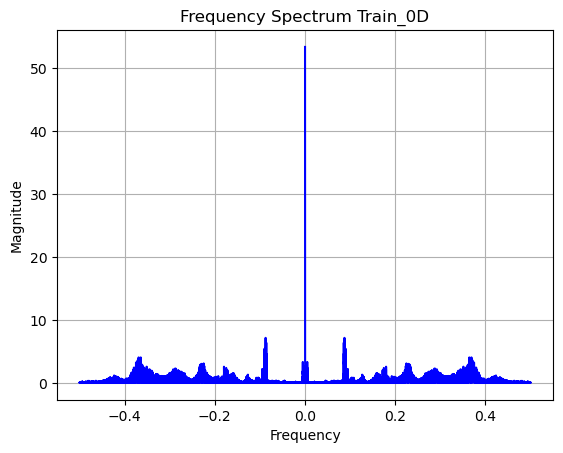

In [9]:
plt.plot(frequencies_0D, np.abs(fft_result_0D), 'b-')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum Train_0D')
plt.grid(True)
plt.show()

In [10]:
# apply FFT algorithm on evaluation

fft_result_0E = np.fft.fft(eval_0E['Vibration_1'])
frequencies_0E = np.fft.fftfreq(len(eval_0E['Vibration_1']))
fft_result_1E = np.fft.fft(eval_1E['Vibration_1'])
frequencies_1E = np.fft.fftfreq(len(eval_1E['Vibration_1']))
fft_result_2E = np.fft.fft(eval_2E['Vibration_1'])
frequencies_2E = np.fft.fftfreq(len(eval_2E['Vibration_1']))
fft_result_3E = np.fft.fft(eval_3E['Vibration_1'])
frequencies_3E = np.fft.fftfreq(len(eval_3E['Vibration_1']))
fft_result_4E = np.fft.fft(eval_4E['Vibration_1'])
frequencies_4E = np.fft.fftfreq(len(eval_4E['Vibration_1']))



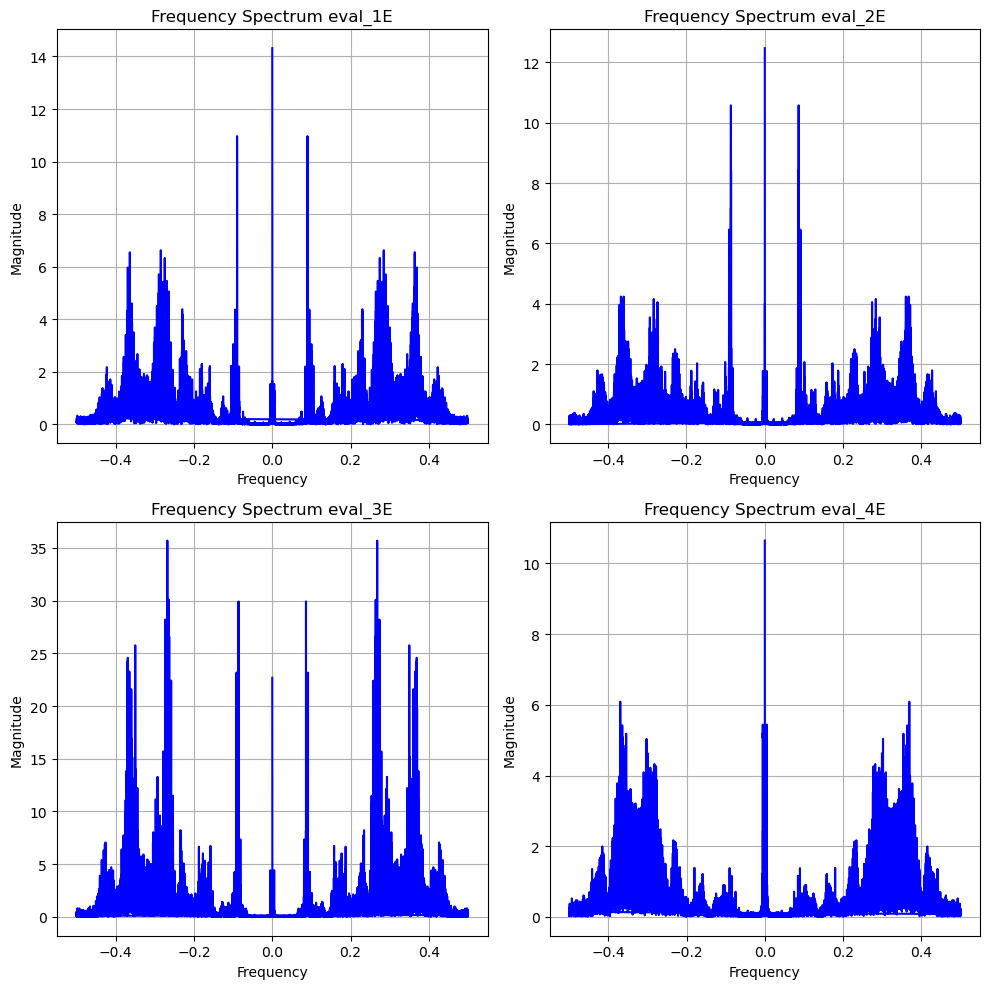

In [11]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Line chart on the top left (axs[0, 0])
axs[0, 0].plot(frequencies_1E, np.abs(fft_result_1E), 'b-')
axs[0, 0].set_title('Frequency Spectrum eval_1E')
axs[0, 0].set_xlabel('Frequency')
axs[0, 0].set_ylabel('Magnitude')
axs[0, 0].grid(True)

# Line chart on the top right (axs[0, 1])
axs[0, 1].plot(frequencies_2E, np.abs(fft_result_2E), 'b-')
axs[0, 1].set_title('Frequency Spectrum eval_2E')
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].grid(True)

# Line chart on the bottom left (axs[1, 0])
axs[1, 0].plot(frequencies_3E, np.abs(fft_result_3E), 'b-')
axs[1, 0].set_title('Frequency Spectrum eval_3E')
axs[1, 0].set_xlabel('Frequency')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].grid(True)

# Line chart on the bottom right (axs[1, 1])
axs[1, 1].plot(frequencies_4E, np.abs(fft_result_4E), 'b-')
axs[1, 1].set_title('Frequency Spectrum eval_4E')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].grid(True)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

### From the FFT, we decomposed into the constituent frequencies. Using the transformed data, we can train a model

In [12]:
# Creating and tagging training and evaluation datasets
X = np.concatenate([X0,X1,X2,X3,X4])
y = np.concatenate([y0,y1,y2,y3,y4])
X_eval = np.concatenate([Xe0, Xe1, Xe2, Xe3, Xe4])
y_eval = np.concatenate([ye0,ye1,ye2,ye3,ye4])
print(X.shape, y.shape, X_eval.shape, y_eval.shape)


(104, 4096) (104,) (34, 4096) (34,)


#### The above means that for 1200 RPM, the training set contains 104 sets of 1s windows while evaluation set contains 34 sets of data

In [13]:
#Do train-test split for modelling
from sklearn.model_selection import train_test_split
train_test_ratio = 0.9
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1-train_test_ratio, random_state=0)

In [15]:
# Applying the FFT algorithm
X_fft = np.abs(np.fft.rfft(X, axis=1))[:,:int(4096/2)]
X_train_fft = np.abs(np.fft.rfft(X_train, axis=1))[:,:int(4096/2)]  # Divide by 2 to remove the negative and imaginery components
X_test_fft = np.abs(np.fft.rfft(X_test, axis=1))[:,:int(4096/2)]
X_eval_fft = np.abs(np.fft.rfft(X_eval, axis=1))[:,:int(4096/2)]

X_fft[:,0]=0  # to remove the zero component term
X_train_fft[:,0]=0
X_test_fft[:,0]=0
X_eval_fft[:,0]=0

In [16]:
X_fft.shape

(104, 2048)

In [16]:
# Do a train test spilit on the FFT data
#from sklearn.model_selection import train_test_split
#train_test_ratio = 0.9
#X_train, X_test, y_train, y_test = train_test_split(X_train_fft,y_train_fft, test_size = 1-train_test_ratio, random_state = 0)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#X_eval = np.reshape(X_eval, (X_eval.shape[0], X_eval.shape[1], 1))

In [17]:
#print(X_train_fft.shape, X_test_fft.shape, X_eval_fft.shape)

In [21]:
# Import required library for CNN
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,LeakyReLU, Conv1D, MaxPooling1D, Flatten, ReLU, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2

In [27]:
# Define the weights based on sample size to give balance between training and evaluation dataset

weight_for_0 = len(y)/(2*len(y[y==0]))
weight_for_1 = len(y)/(2*len(y[y==1]))
class_weight = {0: weight_for_0, 1: weight_for_1}

print(weight_for_0)
print(weight_for_1)
print(class_weight)

2.6
0.6190476190476191
{0: 2.6, 1: 0.6190476190476191}


In [28]:
# Function to train different models by varying convolution layers
def train_models_epoch_50(n_con_layers):
    n_dense_units = 128
    dropout_rate = 0.0
    use_batch_normalization = True
    filter_size = 5
    learning_rate = 0.0001
    n_epochs = 50

    X_in = Input(shape=(X_train.shape[1],1))
    x = X_in
    for j in range(n_con_layers):
        print('Number of convolution layers:',(j+1)*10)
        x = Conv1D(filters=(j+1)*10,
                   kernel_size=filter_size,
                   strides=1,
                   activation='linear',
                   kernel_initializer='he_uniform')(x)
        if use_batch_normalization:
            x = BatchNormalization()(x)
        x = LeakyReLU(alpha=0.05)(x)
        x = MaxPooling1D(pool_size=5, strides=2)(x)
    x = Flatten()(x)
    x = Dense(units = n_dense_units, activation='linear')(x)
    x = ReLU()(x)
    x = Dropout(rate=dropout_rate)(x)
    X_out = Dense(units = 1, activation = 'sigmoid')(x)
    classifier = Model(X_in, X_out)
    classifier.summary()
    
    classifier.compile(optimizer = Adam(learning_rate), loss = 'binary_crossentropy', 
                       metrics = ['accuracy'])

    classifier.fit(X_train, y_train, epochs = n_epochs, batch_size = 64,
                   validation_data=(X_test, y_test), 
                   class_weight=class_weight)
    score = classifier.evaluate(X_eval, y_eval)

In [29]:
for i in range(1,5):
    train_models_epoch_50(i)

Number of convolution layers: 10


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 20440)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     2,616,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,616,677 (9.98 MB)

 Trainable params: 2,616,657 (9.98 MB)

 Non-trainable params: 20 (80.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.3258 - loss: 0.7763 - val_accuracy: 0.8182 - val_loss: 0.6516
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8241 - loss: 0.6265 - val_accuracy: 0.8182 - val_loss: 0.6702
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8137 - loss: 0.5465 - val_accuracy: 0.8182 - val_loss: 0.6852
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8827 - loss: 0.5530 - val_accuracy: 0.9091 - val_loss: 0.6870
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9485 - loss: 0.5847 - val_accuracy: 0.8182 - val_loss: 0.6809
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9042 - loss: 0.5251 - val_accuracy: 0.8182 - val_loss: 0.6711
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8261 - loss: 0.4738 - val_accuracy: 0.8182 - val_loss: 0.6649
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8280 - loss: 0.4764 - val_accuracy: 0.8182 - val_loss: 0.6675

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 2040, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2040, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 2040, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1018, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 20360)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     2,606,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,607,537 (9.95 MB)

 Trainable params: 2,607,477 (9.95 MB)

 Non-trainable params: 60 (240.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.4867 - loss: 0.9815 - val_accuracy: 0.8182 - val_loss: 0.6594
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8013 - loss: 0.5349 - val_accuracy: 0.9091 - val_loss: 0.6735
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8280 - loss: 0.2663 - val_accuracy: 0.3636 - val_loss: 0.6959
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8332 - loss: 0.3408 - val_accuracy: 0.1818 - val_loss: 0.7142
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8332 - loss: 0.2856 - val_accuracy: 0.1818 - val_loss: 0.7237
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8300 - loss: 0.1767 - val_accuracy: 0.1818 - val_loss: 0.7272
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9629 - loss: 0.0729 - val_accuracy: 0.1818 - val_loss: 0.7289
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 0.0718 - val_accuracy: 0.1818 - val_loss: 0.7348

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 2040, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2040, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 2040, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1018, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 1014, 30)       │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1014, 30)       │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 1014, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 505, 30)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 15150)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,939,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,943,807 (7.42 MB)

 Trainable params: 1,943,687 (7.41 MB)

 Non-trainable params: 120 (480.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step - accuracy: 0.5629 - loss: 0.7495 - val_accuracy: 0.9091 - val_loss: 0.6703
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8528 - loss: 0.2060 - val_accuracy: 0.9091 - val_loss: 0.6744
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9629 - loss: 0.1171 - val_accuracy: 0.9091 - val_loss: 0.6737
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9876 - loss: 0.0775 - val_accuracy: 0.1818 - val_loss: 0.7030
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9876 - loss: 0.0505 - val_accuracy: 0.1818 - val_loss: 0.7274
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9928 - loss: 0.0273 - val_accuracy: 0.1818 - val_loss: 0.7397
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9876 - loss: 0.0290 - val_accuracy: 0.1818 - val_loss: 0.7181
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 0.2727 - val_loss: 0.6

Number of convolution layers: 20
Number of convolution layers: 30
Number of convolution layers: 40


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 2040, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 2040, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 2040, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 1018, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 1014, 30)       │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 1014, 30)       │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 1014, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 505, 30)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 501, 40)        │         6,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 501, 40)        │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 501, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 249, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 9960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,275,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,687 (4.90 MB)

 Trainable params: 1,285,487 (4.90 MB)

 Non-trainable params: 200 (800.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 322ms/step - accuracy: 0.2619 - loss: 1.1898 - val_accuracy: 0.1818 - val_loss: 0.6971
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9218 - loss: 0.2920 - val_accuracy: 0.1818 - val_loss: 0.7392
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8456 - loss: 0.1974 - val_accuracy: 0.1818 - val_loss: 0.7852
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8495 - loss: 0.1743 - val_accuracy: 0.1818 - val_loss: 0.8171
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9505 - loss: 0.0999 - val_accuracy: 0.1818 - val_loss: 0.8437
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 1.0000 - loss: 0.0729 - val_accuracy: 0.1818 - val_loss: 0.8857
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.0711 - val_accuracy: 0.1818 - val_loss: 0.9535
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 1.0000 - loss: 0.0447 - val_accuracy: 0.1818 - val_loss: 1

### 2. Trying to load in full data (without filtering of RPM) to train the model

In [30]:
train_0D = pd.read_csv('train_0D_cleaned.csv')
train_1D = pd.read_csv('train_1D_cleaned.csv')
train_2D = pd.read_csv('train_2D_cleaned.csv')
train_3D = pd.read_csv('train_3D_cleaned.csv')
train_4D = pd.read_csv('train_4D_cleaned.csv')

eval_0E = pd.read_csv('eval_0E_cleaned.csv')
eval_1E = pd.read_csv('eval_1E_cleaned.csv')
eval_2E = pd.read_csv('eval_2E_cleaned.csv')
eval_3E = pd.read_csv('eval_3E_cleaned.csv')
eval_4E = pd.read_csv('eval_4E_cleaned.csv')


In [31]:
print(train_0D.shape)
print(train_1D.shape)
print(train_2D.shape)
print(train_3D.shape)
print(train_4D.shape)
print(eval_0E.shape)
print(eval_1E.shape)
print(eval_2E.shape)
print(eval_3E.shape)
print(eval_4E.shape)

(14508032, 8)
(14503936, 8)
(14503936, 8)
(14487553, 8)
(14487553, 8)
(3764225, 8)
(3776564, 8)
(3764225, 8)
(3772416, 8)
(3784704, 8)


In [32]:
print("training below")
print()

X0,y0 = split_X_y(train_1D['Vibration_1'], "no_unbalance")
X1,y1 = split_X_y(train_1D['Vibration_1'], "unbalance")
X2,y2 = split_X_y(train_2D['Vibration_1'], "unbalance")
X3,y3 = split_X_y(train_3D['Vibration_1'], "unbalance")
X4,y4 = split_X_y(train_4D['Vibration_1'], "unbalance")
print()
print("evaluation below")
print()

Xe0,ye0 = split_X_y(eval_0E['Vibration_1'],"no_unbalance")
Xe1,ye1 = split_X_y(eval_1E['Vibration_1'],"unbalance")
Xe2,ye2 = split_X_y(eval_2E['Vibration_1'],"unbalance")
Xe3,ye3 = split_X_y(eval_3E['Vibration_1'],"unbalance")
Xe4,ye4 = split_X_y(eval_4E['Vibration_1'],"unbalance")


training below

no. of windows: 3541
no. of windows: 3541
no. of windows: 3541
no. of windows: 3537
no. of windows: 3537

evaluation below

no. of windows: 919
no. of windows: 922
no. of windows: 919
no. of windows: 921
no. of windows: 924


In [33]:
# Creating and tagging training and evaluation datasets
X = np.concatenate([X0,X1,X2,X3,X4])
y = np.concatenate([y0,y1,y2,y3,y4])
X_eval = np.concatenate([Xe0, Xe1, Xe2, Xe3, Xe4])
y_eval = np.concatenate([ye0,ye1,ye2,ye3,ye4])
print(X.shape, y.shape, X_eval.shape, y_eval.shape)


(17697, 4096) (17697,) (4605, 4096) (4605,)


In [34]:
#Do train-test split for modelling
from sklearn.model_selection import train_test_split
train_test_ratio = 0.9
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1-train_test_ratio, random_state=0)

# Applying the FFT algorithm
X_fft = np.abs(np.fft.rfft(X, axis=1))[:,:int(4096/2)]
X_train_fft = np.abs(np.fft.rfft(X_train, axis=1))[:,:int(4096/2)]  # Divide by 2 to remove the negative and imaginery components
X_test_fft = np.abs(np.fft.rfft(X_test, axis=1))[:,:int(4096/2)]
X_eval_fft = np.abs(np.fft.rfft(X_eval, axis=1))[:,:int(4096/2)]

X_fft[:,0]=0  # to remove the zero component term
X_train_fft[:,0]=0
X_test_fft[:,0]=0
X_eval_fft[:,0]=0

In [36]:
for i in range(1,5):
    train_models_epoch_50(i)

Number of convolution layers: 10


C:\Users\jerem\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 20440)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     2,616,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,616,677 (9.98 MB)

 Trainable params: 2,616,657 (9.98 MB)

 Non-trainable params: 20 (80.00 B)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.5971 - loss: 0.6938 - val_accuracy: 0.5034 - val_loss: 0.6683
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.5822 - loss: 0.5381 - val_accuracy: 0.7938 - val_loss: 0.4754
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.6332 - loss: 0.5076 - val_accuracy: 0.7960 - val_loss: 0.4092
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.6816 - loss: 0.4916 - val_accuracy: 0.8068 - val_loss: 0.9026
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.7101 - loss: 0.4859 - val_accuracy: 0.8068 - val_loss: 0.9989
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.7151 - loss: 0.4744 - val_accuracy: 0.8068 - val_loss: 1.1843
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7148 - loss: 0.4758 - val_accuracy: 0.8068 - val_loss: 1.5621
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.7360 - loss: 0.4623 - 

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 2040, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 2040, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 2040, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 1018, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 20360)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     2,606,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,607,537 (9.95 MB)

 Trainable params: 2,607,477 (9.95 MB)

 Non-trainable params: 60 (240.00 B)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.5302 - loss: 0.6676 - val_accuracy: 0.8040 - val_loss: 0.6263
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.6686 - loss: 0.5159 - val_accuracy: 0.6729 - val_loss: 0.5646
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.7013 - loss: 0.4806 - val_accuracy: 0.6689 - val_loss: 0.5208
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.6994 - loss: 0.4705 - val_accuracy: 0.6266 - val_loss: 0.6333
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7157 - loss: 0.4693 - val_accuracy: 0.7655 - val_loss: 0.5122
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.7354 - loss: 0.4553 - val_accuracy: 0.7497 - val_loss: 0.5268
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.7233 - loss: 0.4504 - val_accuracy: 0.7452 - val_loss: 0.4457
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.7193 - loss: 0.4556 - 

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 2040, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 2040, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 2040, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 1018, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 1014, 30)       │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 1014, 30)       │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 1014, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 505, 30)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 15150)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     1,939,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,943,807 (7.42 MB)

 Trainable params: 1,943,687 (7.41 MB)

 Non-trainable params: 120 (480.00 B)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 28s 104ms/step - accuracy: 0.6124 - loss: 0.6269 - val_accuracy: 0.6277 - val_loss: 0.6173
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.7232 - loss: 0.4757 - val_accuracy: 0.6582 - val_loss: 0.5003
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.7202 - loss: 0.4611 - val_accuracy: 0.5994 - val_loss: 0.6927
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.7425 - loss: 0.4303 - val_accuracy: 0.7785 - val_loss: 0.4226
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 28s 110ms/step - accuracy: 0.7429 - loss: 0.4267 - val_accuracy: 0.5983 - val_loss: 0.9185
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 27s 109ms/step - accuracy: 0.7500 - loss: 0.4194 - val_accuracy: 0.7768 - val_loss: 0.4753
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.7501 - loss: 0.4112 - val_accuracy: 0.7791 - val_loss: 0.5008
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.7616 - loss: 0

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 2040, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 2040, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 2040, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 1018, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 1014, 30)       │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 1014, 30)       │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 1014, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 505, 30)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 501, 40)        │         6,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 501, 40)        │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 501, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 249, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 9960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     1,275,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_10 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,687 (4.90 MB)

 Trainable params: 1,285,487 (4.90 MB)

 Non-trainable params: 200 (800.00 B)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 33s 119ms/step - accuracy: 0.6027 - loss: 0.6347 - val_accuracy: 0.4271 - val_loss: 0.7892
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 30s 120ms/step - accuracy: 0.7269 - loss: 0.4534 - val_accuracy: 0.7198 - val_loss: 0.4690
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 30s 122ms/step - accuracy: 0.7480 - loss: 0.4210 - val_accuracy: 0.7831 - val_loss: 0.3893
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.7683 - loss: 0.3948 - val_accuracy: 0.7780 - val_loss: 0.3664
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - accuracy: 0.7708 - loss: 0.3914 - val_accuracy: 0.6034 - val_loss: 0.8460
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 30s 120ms/step - accuracy: 0.7740 - loss: 0.3852 - val_accuracy: 0.6729 - val_loss: 0.6732
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step - accuracy: 0.7740 - loss: 0.3854 - val_accuracy: 0.7746 - val_loss: 0.3743
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - accuracy: 0.7857 - loss: 0

In [37]:
# Function to train different models by varying convolution layers
def train_models_10_epochs(n_con_layers):
    n_dense_units = 128
    dropout_rate = 0.0
    use_batch_normalization = True
    filter_size = 5
    learning_rate = 0.0001
    n_epochs = 10

    X_in = Input(shape=(X_train.shape[1],1))
    x = X_in
    for j in range(n_con_layers):
        print('Number of convolution layers:',(j+1)*10)
        x = Conv1D(filters=(j+1)*10,
                   kernel_size=filter_size,
                   strides=1,
                   activation='linear',
                   kernel_initializer='he_uniform')(x)
        if use_batch_normalization:
            x = BatchNormalization()(x)
        x = LeakyReLU(alpha=0.05)(x)
        x = MaxPooling1D(pool_size=5, strides=2)(x)
    x = Flatten()(x)
    x = Dense(units = n_dense_units, activation='linear')(x)
    x = ReLU()(x)
    x = Dropout(rate=dropout_rate)(x)
    X_out = Dense(units = 1, activation = 'sigmoid')(x)
    classifier = Model(X_in, X_out)
    classifier.summary()
    
    classifier.compile(optimizer = Adam(learning_rate), loss = 'binary_crossentropy', 
                       metrics = ['accuracy'])

    classifier.fit(X_train, y_train, epochs = n_epochs, batch_size = 64,
                   validation_data=(X_test, y_test), 
                   class_weight=class_weight)
    score = classifier.evaluate(X_eval, y_eval)

In [40]:
for i in range(1,5):
    train_models_10_epochs(i)

Number of convolution layers: 10


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 20440)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     2,616,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_11 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,616,677 (9.98 MB)

 Trainable params: 2,616,657 (9.98 MB)

 Non-trainable params: 20 (80.00 B)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.6696 - loss: 0.7017 - val_accuracy: 0.3859 - val_loss: 0.6983
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.5577 - loss: 0.5812 - val_accuracy: 0.5808 - val_loss: 0.5487
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.5876 - loss: 0.5324 - val_accuracy: 0.7944 - val_loss: 0.4260
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.6278 - loss: 0.5149 - val_accuracy: 0.7960 - val_loss: 0.4522
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.6796 - loss: 0.4948 - val_accuracy: 0.7960 - val_loss: 0.4532
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.6721 - loss: 0.4954 - val_accuracy: 0.7966 - val_loss: 0.5209
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.6986 - loss: 0.4914 - val_accuracy: 0.7972 - val_loss: 0.7100
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.7115 - loss: 0.4819 - 

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_24 (Conv1D)              │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_25 (Conv1D)              │ (None, 2040, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 2040, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 2040, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 1018, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 20360)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │     2,606,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_12 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,607,537 (9.95 MB)

 Trainable params: 2,607,477 (9.95 MB)

 Non-trainable params: 60 (240.00 B)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.5747 - loss: 0.6880 - val_accuracy: 0.8068 - val_loss: 0.5193
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6797 - loss: 0.5355 - val_accuracy: 0.8045 - val_loss: 0.4535
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7098 - loss: 0.4823 - val_accuracy: 0.6497 - val_loss: 0.5070
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7116 - loss: 0.4684 - val_accuracy: 0.7638 - val_loss: 0.5729
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7249 - loss: 0.4608 - val_accuracy: 0.7480 - val_loss: 0.4419
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7328 - loss: 0.4580 - val_accuracy: 0.7424 - val_loss: 0.4332
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7243 - loss: 0.4599 - val_accuracy: 0.7260 - val_loss: 0.4904
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.7244 - loss: 0.4547 - 

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_26 (Conv1D)              │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_27 (Conv1D)              │ (None, 2040, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 2040, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_27 (LeakyReLU)      │ (None, 2040, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 1018, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 1014, 30)       │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 1014, 30)       │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_28 (LeakyReLU)      │ (None, 1014, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_28 (MaxPooling1D) │ (None, 505, 30)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 15150)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     1,939,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,943,807 (7.42 MB)

 Trainable params: 1,943,687 (7.41 MB)

 Non-trainable params: 120 (480.00 B)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.5715 - loss: 0.6835 - val_accuracy: 0.3972 - val_loss: 0.7066
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.6481 - loss: 0.5053 - val_accuracy: 0.7910 - val_loss: 0.4729
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.6861 - loss: 0.4702 - val_accuracy: 0.7768 - val_loss: 0.4275
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.7020 - loss: 0.4550 - val_accuracy: 0.6169 - val_loss: 0.6707
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.7153 - loss: 0.4362 - val_accuracy: 0.7492 - val_loss: 0.4934
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.7346 - loss: 0.4199 - val_accuracy: 0.5147 - val_loss: 1.0296
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.7512 - loss: 0.4094 - val_accuracy: 0.6395 - val_loss: 0.6349
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.7548 - loss: 0

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 4096, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_29 (Conv1D)              │ (None, 4092, 10)       │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 4092, 10)       │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_29 (LeakyReLU)      │ (None, 4092, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_29 (MaxPooling1D) │ (None, 2044, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_30 (Conv1D)              │ (None, 2040, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 2040, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_30 (LeakyReLU)      │ (None, 2040, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_30 (MaxPooling1D) │ (None, 1018, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_31 (Conv1D)              │ (None, 1014, 30)       │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 1014, 30)       │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_31 (LeakyReLU)      │ (None, 1014, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_31 (MaxPooling1D) │ (None, 505, 30)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_32 (Conv1D)              │ (None, 501, 40)        │         6,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 501, 40)        │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_32 (LeakyReLU)      │ (None, 501, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_32 (MaxPooling1D) │ (None, 249, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 9960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │     1,275,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,687 (4.90 MB)

 Trainable params: 1,285,487 (4.90 MB)

 Non-trainable params: 200 (800.00 B)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 32s 118ms/step - accuracy: 0.6253 - loss: 0.5812 - val_accuracy: 0.5898 - val_loss: 0.6451
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.6992 - loss: 0.4560 - val_accuracy: 0.7847 - val_loss: 0.4142
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 28s 114ms/step - accuracy: 0.7367 - loss: 0.4231 - val_accuracy: 0.7531 - val_loss: 0.4856
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.7390 - loss: 0.4081 - val_accuracy: 0.6559 - val_loss: 0.6171
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step - accuracy: 0.7426 - loss: 0.4014 - val_accuracy: 0.7678 - val_loss: 0.4873
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 29s 117ms/step - accuracy: 0.7523 - loss: 0.3932 - val_accuracy: 0.6689 - val_loss: 0.6296
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.7722 - loss: 0.3752 - val_accuracy: 0.7881 - val_loss: 0.3884
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 29s 115ms/step - accuracy: 0.7749 - loss: 0